<a href="https://colab.research.google.com/github/Ybardini/Demo/blob/master/yahya_sandbox/Biol300_hw8_group_Bardini_p3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This problem will explore Fisher's argument that Mendel's data were *too good*. [You can read more about the controversy here](https://www.colorado.edu/physics/sites/default/files/attached-files/mendelfishercontroversy.pdf). That is, Fisher suspected that the results that Mendel presented from his pea experiments did not vary much as would be expected. To put this to the test, we will simulate Mendel's crossing experiments many times over and see how his published results compare with the simulations.

Below I set up most of the simulation for you. Your remaining task will be to conduct the simulation many times over, computing a desired test statistic each time, and then comparing to the real data to the simulated data.

# The simulation

In [1]:
import random
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

Let's have python flip a coin for us! If you hit the "play" button below multiple times, you will see the output will switch from heads `'H'` to tails `'T'` randomly.

In [2]:
# coin flip for heads or tails
random.choice(["H","T"])

'T'

We can now "flip a coin" twice to construct a genotype. Again, if you run this cell of code multiple times, you may see different results each time.

In [3]:
# two coin flips, one for each allele
allele1 = random.choice(["H","T"])
allele2 = random.choice(["H","T"])

# construct the genotype from the two alleles
genotype = allele1 + allele2

# display the genotype
print(genotype)

TT


Now let's map these coin flips onto a phenotype of interest. As an example, we can correspond the `TT` genotype to green peas and all other genotypes to yellow peas. 

In [4]:
# TT genotype corresponds to green phenotype
if genotype == "TT":
  phenotype = "green"

# all other genotypes correspond to yellow phenotype
else: 
  phenotype = "yellow"

# display the resulting phenotype
print(phenotype)

green


Now let's simulate 100 "coin flips" as a way to get a percent of yellow peas from a Mendelian experiment. For this, we will simulate *each* plant in turn doing a set of coin flips and recording their genotype as a combination of heads and tails.

In [5]:
def sim_coinflips(num_plants = 100):

  # start a counter for yellow peas
  yellow_count = 0

  # repeat coin flips for each student
  for i in range(num_plants):
    
    # do coin flips to make genotype
    allele1 = random.choice(["H","T"])
    allele2 = random.choice(["H","T"])
    genotype = allele1 + allele2

    # add to yellow counter if the genotpye is anything other than TT
    if genotype != "TT":
      yellow_count = yellow_count + 1

  # return a precentage of yellow
  return yellow_count*100 / num_plants


Below we can now try out this simulation. If you run it multiple times, it should return a different answer each time. Should generally be around 75, but can sometimes be higher or lower. This demonstrates the **real** variability that can arise in biology!

In [6]:
sim_coinflips()

74.0

Finally, we can simulate Mendel's **real** experiments and see how much they deviate from the expected 75%. In this case, instead of running the simulation for just 100 plants, we can run it for the true number of plants he looked at, whether it was 580 or 8023. 

By repeatedly running these simulations we can get a sense of how surprising Mendel's results were.

In [7]:
# gene 1, shape of seeds
percent_dominant = sim_coinflips(num_plants=7324)
print("Percent dominant:", np.round(percent_dominant, 2))

# gene 2, color of cotyledons
percent_dominant = sim_coinflips(num_plants=8023)
print("Percent dominant:", np.round(percent_dominant, 2))

# gene 3, color of seed coats
percent_dominant = sim_coinflips(num_plants=929)
print("Percent dominant:", np.round(percent_dominant, 2))

# gene 4, shape of pod
percent_dominant = sim_coinflips(num_plants=1181)
print("Percent dominant:", np.round(percent_dominant, 2))

# gene 5, color of pod
percent_dominant = sim_coinflips(num_plants=580)
print("Percent dominant:", np.round(percent_dominant, 2))

# gene 6, distirbution of flowers
percent_dominant = sim_coinflips(num_plants=858)
print("Percent dominant:", np.round(percent_dominant, 2))

# gene 7, height of plant
percent_dominant = sim_coinflips(num_plants=1064)
print("Percent dominant:", np.round(percent_dominant, 2))

Percent dominant: 74.75
Percent dominant: 75.22
Percent dominant: 76.0
Percent dominant: 74.85
Percent dominant: 76.38
Percent dominant: 76.11
Percent dominant: 75.38


# Problem 3 (30 points)

A. For each of the seven traits in turn, simulate Mendel's experiment 1000 times, keeping in mind that Mendel looked at a different number of plants for each trait. Report a 95% confidence interval for each trait. 

In [8]:
reps = 1000
seeds = np.zeros(reps)
cotyledons = np.zeros(reps)
coats = np.zeros(reps)
podshapes = np.zeros(reps)
podcolors = np.zeros(reps)
flowers = np.zeros(reps)
heights = np.zeros(reps)
datas = [seeds, cotyledons, coats, podshapes, podcolors, flowers, heights]

for i in range(reps):
  seeds[i] = np.round(sim_coinflips(num_plants=7324), 2)
  cotyledons[i] = np.round(sim_coinflips(num_plants=8023), 2)
  coats[i] = np.round(sim_coinflips(num_plants=929), 2)
  podshapes[i] = np.round(sim_coinflips(num_plants=1181), 2)
  podcolors[i] = np.round(sim_coinflips(num_plants=580), 2)
  flowers[i] = np.round(sim_coinflips(num_plants=858), 2)
  heights[i] = np.round(sim_coinflips(num_plants=1064), 2)

In [34]:
indreps = [7324, 8023, 929, 1181, 580, 858, 1064]

In [9]:
boundlower = []
boundupper = []
percentile025 = int(.025*reps)
percentile975 = int(.975*reps)
for data in datas:
  data.sort()
  boundlower.append(data[percentile025])
  boundupper.append(data[percentile975])
headers = ['Seeds', 'Cotyledons', 'Coats', 'Shape of Pods', 'Color of Pods', 'Flowers', 'Heights']
for i in range(7): 
  print(headers[i], '('+f'{float(boundlower[i]):.2f}'+', '+f'{float(boundupper[i]):.2f}'+')')

Seeds (74.00, 75.96)
Cotyledons (73.99, 75.96)
Coats (72.12, 77.72)
Shape of Pods (72.65, 77.65)
Color of Pods (71.55, 78.28)
Flowers (72.26, 77.86)
Heights (72.37, 77.73)


B. From Mendel's results (shown in class), how many of the traits lie within the confidence intervals you reported? Does this lead credence to Fisher's claim that Mendel's data were "too good"?

In [10]:
mendels = [74.7, 75.1, 75.9, 74.7, 73.8, 75.9, 74.0]

Shape of seeds is within the range.
Colour of Cotyledons is within the range.
Colour of seed coats is within the range.
Shape of Pod is within the range.
Colour of pod is within the range.
Dsitribution of flowers is within the range.
Height of plant is within the range.

Therefore, it does not lead credence to fisher's claim that mendel's data were too good.

C. To further assess if Mendel's results are better than expected, the test statistic we will be using is the total deviation from 75% across the seven experiments. Look at the data shared in class, and for each pea phenotype calculate how much the percentage deviates from the expected 75%. What is the total deviation as summed up for all seven traits? Make sure to use the absolute value!

In [11]:
variations = []
for value in mendels:
  diff = np.abs(value-75.0)
  if diff <0:
    diff*=-1
  variations.append(diff)
sum = 0
for value in variations:
  sum+=value
print(np.round(sum, 2))

4.7


D. Simulate Mendel's entire set of 7 experiments 1,000 times. For each simulation, record the total deviation from the expected 75%, summed up for all the seven traits. Again, we want the absolute value here, since we care about the total deviation from expected.

In [22]:
def varcalc(datas):
  loop = -1
  for dataset in datas:
    variations = []
    sum = 0
    loop+=1
    for value in dataset:
      diff = value-75.0
      sum+=diff
      if sum <0:
        sum*=-1
    print(headers[loop]+' has a variation of '+f'{float(np.round(sum, 2)):.2f}')



In [23]:
varcalc(datas)

Seeds has a variation of 201.35
Cotyledons has a variation of 193.64
Coats has a variation of 581.02
Shape of Pods has a variation of 516.17
Color of Pods has a variation of 702.20
Flowers has a variation of 559.19
Heights has a variation of 549.50


E. Plot an ECDF of your simulated results. By eye, about what percentage of results were "as good" or better than Mendel's results? Remember we are testing Fisher's argument that Mendel's data were "too good", so were are looking for results with deviation equal to or less than what Mendel really saw.

In [24]:
def ecdf(data):
  """Generate x and y values for plotting an ECDF."""
  x_vals = np.sort(data)
  y_vals = np.arange(1, len(data)+1) / len(data)
  
  return x_vals, y_vals

In [27]:
for value in variations:
  if value < 0 :
    value*=-1
print(variations)

[0.29999999999999716, 0.09999999999999432, 0.9000000000000057, 0.29999999999999716, 1.2000000000000028, 0.9000000000000057, 1.0]


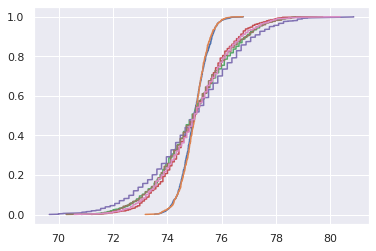

In [32]:
proportions = []
extremes = 0
iteration = -1

for category in datas:
  iteration +=1

  x, y = ecdf(category)
  plt.plot(x,y)

  for point in category:

    variation = np.abs(point-75.0)

    if variation >= variations[iteration]:
      extremes+=1

      cat = list(category)
    if cat[cat.index(point)] == cat[-1]:

      proportions.append([headers[iteration], extremes])
      
      extremes = 0


In [33]:
print(proportions)

[['Seeds', 568], ['Cotyledons', 855], ['Coats', 551], ['Shape of Pods', 833], ['Color of Pods', 522], ['Color of Pods', 1], ['Flowers', 508], ['Heights', 467]]


In [36]:
del proportions[5]
proportions[4][1] = 523
print(proportions)

[['Seeds', 568], ['Cotyledons', 855], ['Coats', 551], ['Shape of Pods', 833], ['Color of Pods', 523], ['Flowers', 508], ['Heights', 467]]


F. Compute a p-value from your simulated results. Do you agree with Fisher's argument that Mendel's data were too good?

In [38]:
pvals = []
iteration = 0

for pair in proportions:

  pval = pair[-1]/indreps[iteration]
  pvals.append(pval)

  iteration+=1
  
print(pvals)


[0.07755324959038777, 0.10656861523121026, 0.5931108719052745, 0.7053344623200677, 0.9017241379310345, 0.5920745920745921, 0.43890977443609025]


***at the alpha = .05 level, all pvalues>alpha therefore we fail to reject the null hypothesis that Medel's results are not too good, and do not have sufficient evidence to conclude his results were too good***